article 

1. 필요한 컬럼만 살리기
article_id/ product_name ( product_code) / index_group_name (index_group_no) / garment_group_name (garment_group_co) / perceived_colour_master_name
2. 살린 이유?
 article_id 는 다른 테이블과 join
 garment_group_name (garment_group_co) 범용적 의류 종류
 index_group_name (index_group_no) 타겟팅
 perceived_colour_master_name 대표 색상
 3. 컬럼(코드번호) / 앞글자 대문자 / article_id > 타 테이블 조인
 4. 상위 20% 특징

In [33]:
import pandas as pd
articles= pd.read_csv("../../main/h&m_dataset/articles_hm.csv")
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [34]:
# 1. 필요한 컬럼만 살리기
# article_id/ product_name ( product_code) / index_group_name (index_group_no) /
#  garment_group_name (garment_group_co) / perceived_colour_master_name
keep = ['article_id','prod_name','product_code','index_group_name','index_group_no','garment_group_name','garment_group_no','perceived_colour_master_name']
articles = articles[keep].copy()
articles

,article_id,prod_name,product_code,index_group_name,index_group_no,garment_group_name,garment_group_no,perceived_colour_master_name
0,108775015,Strap top,108775,Ladieswear,1,Jersey Basic,1002,Black
1,108775044,Strap top,108775,Ladieswear,1,Jersey Basic,1002,White
2,108775051,Strap top (1),108775,Ladieswear,1,Jersey Basic,1002,White
3,110065001,OP T-shirt (Idro),110065,Ladieswear,1,"Under-, Nightwear",1017,Black
4,110065002,OP T-shirt (Idro),110065,Ladieswear,1,"Under-, Nightwear",1017,White
...,...,...,...,...,...,...,...,...
105537,953450001,5pk regular Placement1,953450,Menswear,3,Socks and Tights,1021,Black
105538,953763001,SPORT Malaga tank,953763,Ladieswear,1,Jersey Fancy,1005,Black
105539,956217002,Cartwheel dress,956217,Ladieswear,1,Jersey Fancy,1005,Black
105540,957375001,CLAIRE HAIR CLAW,957375,Divided,2,Accessories,1019,Black


In [35]:
# 컬럼(코드번호) 
articles['index_group'] = articles['index_group_name'] + " (" + articles['index_group_no'].astype(str) + ")"
articles['garment_group'] = articles['garment_group_name'] + " (" + articles['garment_group_no'].astype(str) + ")"
articles['product'] = articles['prod_name'] + " (" + articles['product_code'].astype(str) + ")"

articles = articles.drop(['prod_name', 'product_code', 'index_group_name', 'index_group_no', 'garment_group_name', 'garment_group_no'], axis=1)
articles

,article_id,perceived_colour_master_name,index_group,garment_group,product
0,108775015,Black,Ladieswear (1),Jersey Basic (1002),Strap top (108775)
1,108775044,White,Ladieswear (1),Jersey Basic (1002),Strap top (108775)
2,108775051,White,Ladieswear (1),Jersey Basic (1002),Strap top (1) (108775)
3,110065001,Black,Ladieswear (1),"Under-, Nightwear (1017)",OP T-shirt (Idro) (110065)
4,110065002,White,Ladieswear (1),"Under-, Nightwear (1017)",OP T-shirt (Idro) (110065)
...,...,...,...,...,...
105537,953450001,Black,Menswear (3),Socks and Tights (1021),5pk regular Placement1 (953450)
105538,953763001,Black,Ladieswear (1),Jersey Fancy (1005),SPORT Malaga tank (953763)
105539,956217002,Black,Ladieswear (1),Jersey Fancy (1005),Cartwheel dress (956217)
105540,957375001,Black,Divided (2),Accessories (1019),CLAIRE HAIR CLAW (957375)


In [36]:
# 컬럼명 순서 바꾸기
new_order = ['article_id', 'product', 'index_group', 'garment_group', 'perceived_colour_master_name']
articles = articles[new_order]
articles


,article_id,product,index_group,garment_group,perceived_colour_master_name
0,108775015,Strap top (108775),Ladieswear (1),Jersey Basic (1002),Black
1,108775044,Strap top (108775),Ladieswear (1),Jersey Basic (1002),White
2,108775051,Strap top (1) (108775),Ladieswear (1),Jersey Basic (1002),White
3,110065001,OP T-shirt (Idro) (110065),Ladieswear (1),"Under-, Nightwear (1017)",Black
4,110065002,OP T-shirt (Idro) (110065),Ladieswear (1),"Under-, Nightwear (1017)",White
...,...,...,...,...,...
105537,953450001,5pk regular Placement1 (953450),Menswear (3),Socks and Tights (1021),Black
105538,953763001,SPORT Malaga tank (953763),Ladieswear (1),Jersey Fancy (1005),Black
105539,956217002,Cartwheel dress (956217),Ladieswear (1),Jersey Fancy (1005),Black
105540,957375001,CLAIRE HAIR CLAW (957375),Divided (2),Accessories (1019),Black


customer

1. fn, fashion_news_frequency > 충성고객 연결지어보기
2. 연령층 20 ~ 70 / 2030 4050 6070 으로 나눠서 살펴 보기
3. 앞글자 대문자
4. customer_id join

In [37]:
import pandas as pd
customer = pd.read_csv("../../main/h&m_dataset/customer_hm.csv")
customer.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0,0,ACTIVE,NONE,49
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0,0,ACTIVE,NONE,25
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0,0,ACTIVE,NONE,24
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0,0,ACTIVE,NONE,54
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1,1,ACTIVE,Regularly,52


In [38]:
# fashion_news_frequency > null 값 1개 > 
# fn, fashion_news_frequency 구독 + Regularly 인 고객이 어떤 상품을 구매하고, 총 구매 횟수 확인해 충성고객 여부 확인하기 

customer.info()

# fashion_news_frequency > null 값 1개 찾기

null_customers = customer.query('fashion_news_frequency.isnull()')
null_customers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   customer_id             1048575 non-null  object
 1   FN                      1048575 non-null  int64 
 2   Active                  1048575 non-null  int64 
 3   club_member_status      1048575 non-null  object
 4   fashion_news_frequency  1048574 non-null  object
 5   age                     1048575 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 48.0+ MB


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
876108,a79d9cbfaceb0d25a91caccfad167d4d6391fd5bb4292b...,1,0,ACTIVE,NaN,38


In [39]:
# customer1에 20~80세 데이터만 저장 (그 외 연령 대 제외)
customer = customer.query('20 <= age <= 80').copy()
customer

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0,0,ACTIVE,NONE,49
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0,0,ACTIVE,NONE,25
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0,0,ACTIVE,NONE,24
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0,0,ACTIVE,NONE,54
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1,1,ACTIVE,Regularly,52
...,...,...,...,...,...,...
1048570,c88f5971612e659a4e90d6f08d9c29bdf1e4268fcf52d5...,1,1,ACTIVE,Regularly,22
1048571,c88f5d0deba322a686e7928da6a7f3d2318e102d1c2cdb...,1,1,ACTIVE,Regularly,41
1048572,c88f99a55b10f6dd50dd87c3ca05af4a8a6c98f3e6fbc5...,0,0,ACTIVE,NONE,38
1048573,c88fa15c06519c4bdcab386fea313b226113584b729874...,1,1,ACTIVE,Regularly,54


transaction
1. 결측치 x > 앞글자 대문자, datetime, price 조정
2. 고객중심 인사이트 > 20 ~ 80세 중 가장 결제를 많이하는 연령대는 어디인지? 누가 가장 자주, 많이 결제하는지?(vip)
3. 상품/매출 중심 인사이트 > 가장 잘 팔리는 상품군 / 
   판매량은 적지만 단가가 높아 매출에 크게 기여하는 상품(이건 이상치로 봐야할까? 물건이 많이 팔려서 매출이 높은건 아니니까..)
   재고 및 단종 결정>상품 정보는 있는데 거래가 발생하지 않은 상품 찾기 left 조인

In [40]:
import pandas as pd
transactions = pd.read_csv("../../main/h&m_dataset/transactions_hm.csv")
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,760597002,0.033881,2
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,488561032,0.016932,2
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,682771001,0.033881,2
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,742400033,0.003220,1


In [41]:
# 날짜데이터 datetime변환 
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])
print(transactions['t_dat'].info())
transactions.head()

<class 'pandas.core.series.Series'>
RangeIndex: 1048575 entries, 0 to 1048574
Series name: t_dat
Non-Null Count    Dtype         
--------------    -----         
1048575 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 8.0 MB
None


,t_dat,customer_id,article_id,price,sales_channel_id
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,760597002,0.033881,2
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,488561032,0.016932,2
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,682771001,0.033881,2
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,742400033,0.003220,1


In [ ]:
# 가입은 했지만(customer o) 구매이력이 없는 고객은 제외 (transaction o) > 약 79만 
# "고객중심 인사이트" 20~80세 중 가장 결제를 많이하는 연령대는 어디인지? 누가 가장 자주, 많이 결제하는지?(vip)
df = transactions.merge(customer, on="customer_id", how="inner")
df


,t_dat,customer_id,article_id,price,sales_channel_id,FN,Active,club_member_status,fashion_news_frequency,age
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2,1,1,ACTIVE,Regularly,51
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,760597002,0.033881,2,0,0,ACTIVE,NONE,28
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,488561032,0.016932,2,1,1,ACTIVE,Regularly,37
3,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,742400033,0.003220,1,0,0,ACTIVE,NONE,35
4,2019-03-22,437d51082dc72fe41289783e165a2a2a6958ec7bd980b4...,559634009,0.033881,2,0,0,ACTIVE,NONE,20
...,...,...,...,...,...,...,...,...,...,...
798849,2019-03-25,8e900818a1da0e73300a012794615993fbefb43f851430...,766346001,0.025407,2,0,0,ACTIVE,NONE,21
798850,2019-10-18,13aa106eeb8a6fa2f9e2ab888a3a2ee118a3900670f0d8...,811905001,0.016932,2,1,1,ACTIVE,Regularly,39
798851,2019-04-06,5f51e21397c1248aafdf9712435bd4be063eb093f56229...,690108001,0.021729,2,1,1,ACTIVE,Regularly,44
798852,2019-03-20,3421bd479ee13287a65660cf816b01d0d803d1d6d0fe73...,583534002,0.016932,2,0,0,ACTIVE,NONE,51


In [ ]:
# 모든상품 다 가져오고, 거래내역있음 옆에 붙이기 / 판매 안된 상품은 nan > 총 110만 
# 상품 정보만 있고 거래 없는 경우 
df1 = articles.merge(transactions, on = "article_id", how ="left").copy()
df1


,article_id,product,index_group,garment_group,perceived_colour_master_name,t_dat,customer_id,price,sales_channel_id
0,108775015,Strap top (108775),Ladieswear (1),Jersey Basic (1002),Black,2019-02-22,e83f76a201842b01ca62c4e8bdafe2eded559878ad0641...,0.007186,1.0
1,108775015,Strap top (108775),Ladieswear (1),Jersey Basic (1002),Black,2019-06-08,6466578ef80bd59e881ce32aabf019a4d903e8496aac44...,0.008458,2.0
2,108775015,Strap top (108775),Ladieswear (1),Jersey Basic (1002),Black,2019-01-25,3b2037c9d670c22b006a745cac9ed96809491d38bd1e9f...,0.008458,2.0
3,108775015,Strap top (108775),Ladieswear (1),Jersey Basic (1002),Black,2019-02-17,a193d9fe3dfea4082289a99e465e8fc4499ea01cccf3fd...,0.008458,2.0
4,108775015,Strap top (108775),Ladieswear (1),Jersey Basic (1002),Black,2019-02-16,92eb37643d5de57a9f92228b5b6f868c8422ec064f4d9d...,0.008458,2.0
...,...,...,...,...,...,...,...,...,...
1102833,953450001,5pk regular Placement1 (953450),Menswear (3),Socks and Tights (1021),Black,NaT,NaN,NaN,NaN
1102834,953763001,SPORT Malaga tank (953763),Ladieswear (1),Jersey Fancy (1005),Black,NaT,NaN,NaN,NaN
1102835,956217002,Cartwheel dress (956217),Ladieswear (1),Jersey Fancy (1005),Black,NaT,NaN,NaN,NaN
1102836,957375001,CLAIRE HAIR CLAW (957375),Divided (2),Accessories (1019),Black,NaT,NaN,NaN,NaN


In [ ]:
# 실제 거래내역 + 그 상품이 무엇인지 정보 붙인것으로 판매된 상품만 보인다. nan 제거된 값> 총 104만 
# 상품/매출 중심 인사이트 > 가장 잘 팔리는 상품군 / 판매량은 적지만 단가가 높아 매출에 크게 기여하는 상품(이건 이상치로 봐야할까?, 물건이 많이 팔려서 매출이 높은건 아니니까..)/재고 및 단종 결정>상품 정보는 있는데 거래각 발생하지 않은 상품 찾기 left 조인

df1 = transactions.merge(articles, on = "article_id", how ="inner").copy()
df1

,t_dat,customer_id,article_id,price,sales_channel_id,product,index_group,garment_group,perceived_colour_master_name
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2,ZEBRA CF TVP (698328),Divided (2),Jersey Fancy (1005),Blue
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,760597002,0.033881,2,BUBBLE WRAP TOP (760597),Ladieswear (1),Jersey Fancy (1005),White
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,488561032,0.016932,2,Teddy jogger. (488561),Menswear (3),Shorts (1025),Blue
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,682771001,0.033881,2,Yuki shopper (682771),Ladieswear (1),Accessories (1019),Black
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,742400033,0.003220,1,1pk Sportsock (742400),Menswear (3),Socks and Tights (1021),White
...,...,...,...,...,...,...,...,...,...
1048570,2019-03-25,8e900818a1da0e73300a012794615993fbefb43f851430...,766346001,0.025407,2,Kanta RW Slacks (766346),Ladieswear (1),Trousers (1009),Beige
1048571,2019-10-18,13aa106eeb8a6fa2f9e2ab888a3a2ee118a3900670f0d8...,811905001,0.016932,2,J Sunray (811905),Ladieswear (1),Dresses Ladies (1013),Black
1048572,2019-04-06,5f51e21397c1248aafdf9712435bd4be063eb093f56229...,690108001,0.021729,2,Straight 5pkt Lowprice (690108),Menswear (3),Trousers Denim (1016),Blue
1048573,2019-03-20,3421bd479ee13287a65660cf816b01d0d803d1d6d0fe73...,583534002,0.016932,2,Bradley (583534),Ladieswear (1),Jersey Basic (1002),Black


In [ ]:
# 상품 정보는 있으나 거래 안된 물품 약 5만개 > 재고 처분
df1.isna().sum()

t_dat                           0
customer_id                     0
article_id                      0
price                           0
sales_channel_id                0
product                         0
index_group                     0
garment_group                   0
perceived_colour_master_name    0
dtype: int64

누가, 무엇을, 얼마나 샀는지 확인하려면? 3개 테이블 합치기 

In [ ]:
# 테이블 3개 통합 1. 거래 + 고객 = 결과물 > 결과물 + 상품

df_temp = transactions.merge(customer, on="customer_id", how="inner")
df_final = df_temp.merge(articles, on="article_id", how="inner")

In [51]:
# 제미나이 도움!! 다시 보기
# 연령대별 그룹
bins = [0,20,30,40,50,60,100]
labels = ['10대 이하', '20대', '30대', '40대', '50대', '60대이상']
df_final['age_group'] = pd.cut(df_final['age'], bins=bins, labels=labels)

# 연령대별 결제 건수 및 총 결제 금액 계산
age_insight = df_final.groupby('age_group').agg({
    't_dat': 'count',      # 결제 빈도
    'price': 'sum'         # 결제 금액 합계
}).rename(columns={'t_dat': 'count', 'price': 'total_amount'})

# 결과 확인
print(age_insight.sort_values(by='total_amount', ascending=False))

            count  total_amount
age_group                      
20대        344290   9400.813171
30대        144995   4044.753976
40대        135082   3729.253485
50대        124437   3652.854689
60대이상       31597    960.237795
10대 이하      18453    454.603067


C:\Users\fists\AppData\Local\Temp\ipykernel_24808\2531525138.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_insight = df_final.groupby('age_group').agg({


In [53]:
# 고객별로 집계
vip_insight = df_final.groupby('customer_id').agg({
    'price': 'sum',                  # 1. 총 결제 금액 (누가 많이?)
    't_dat': 'count',                # 2. 결제 횟수 (누가 자주?)
    'article_id': 'nunique',         # 3. 상품 종류 (얼마나 다양하게?)
    'sales_channel_id': 'nunique'    # 4. 채널 이용 다양성
}).rename(columns={'price': 'total_spent', 't_dat': 'frequency', 'article_id': 'unique_articles'})

# 금액과 횟수 기준으로 정렬하여 상위 10명 추출
top_vips = vip_insight.sort_values(by=['total_spent', 'frequency'], ascending=False).head(10)
top_vips

,total_spent,frequency,unique_articles,sales_channel_id
customer_id,,,,
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b,2.012712,60,59,2
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296,1.844746,43,43,2
a728b385ebbb4b2da7b5f5d4d945e411117462ac413c449942634e7cb2bf90ba,1.733153,41,41,1
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71,1.675508,53,52,2
6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2e57161f0ef810a4b55,1.526831,34,34,1
17be8f7a66038e9e11b15830a444e2c16140479c858cf573a6ecafe6ed9542cf,1.518492,11,6,1
94304b03ce46e62b360d7f6921dd7a498f189ee8e5c1cc295242608eaa86f8ab,1.490085,37,37,2
689f4eda82fdf3d9bfe8e524bbd0d931c4d7690f2234d3e48779f924aaf4103d,1.435492,42,42,1
43efe8db05d0bbf1e55a8c955897e547ab1d50220b7763bd40973cd4452f46dc,1.432644,36,35,1


1. price를 SEK 단위로 환전 > 보통 price * 590 이면 SEK 과 비슷해진다고 함. > 원 붙이니 복잡해짐 일단 보류
2. 전체 매출 중 상/하위 20% 
3. 시각화 전 앞글자 대문자 변환
4. 전체 분포 시각화 > 상/하위 20% 필터링 > 필터링된 그룹별 심화 


In [62]:
#앞글자 대문자 변환
articles.columns = [col.replace('_', ' ').title().replace(' ', '_') for col in articles.columns]
str_cols = ['Product', 'Index_Group', 'Garment_Group', 'Perceived_Colour_Master_Name']
for col in str_cols:
    articles[col] = articles[col].str.title()

articles.head()


,Article_Id,Product,Index_Group,Garment_Group,Perceived_Colour_Master_Name
0,108775015,Strap Top (108775),Ladieswear (1),Jersey Basic (1002),Black
1,108775044,Strap Top (108775),Ladieswear (1),Jersey Basic (1002),White
2,108775051,Strap Top (1) (108775),Ladieswear (1),Jersey Basic (1002),White
3,110065001,Op T-Shirt (Idro) (110065),Ladieswear (1),"Under-, Nightwear (1017)",Black
4,110065002,Op T-Shirt (Idro) (110065),Ladieswear (1),"Under-, Nightwear (1017)",White


In [63]:
#앞글자 대문자 변환
customer.columns = [col.replace('_', ' ').title().replace(' ', '_') for col in customer.columns]

str_cols = ['Customer_Id', 'Club_Member_Status', 'Fashion_News_Frequency']

for col in str_cols:
   customer[col] = customer[col].astype(str).str.title()

customer.head()


,Customer_Id,Fn,Active,Club_Member_Status,Fashion_News_Frequency,Age
0,00000Dbacae5Abe5E23885899A1Fa44253A17956C6D1C3...,0,0,Active,None,49
1,0000423B00Ade91418Cceaf3B26C6Af3Dd342B51Fd051E...,0,0,Active,None,25
2,000058A12D5B43E67D225668Fa1F8D618C13Dc232Df0Ca...,0,0,Active,None,24
3,00005Ca1C9Ed5F5146B52Ac8639A40Ca9D57Aeff4D1Bd2...,0,0,Active,None,54
4,00006413D8573Cd20Ed7128E53B7B13819Fe5Cfc2D801F...,1,1,Active,Regularly,52


In [64]:
#앞글자 대문자
transactions.columns = [col.replace('_', ' ').title().replace(' ', '_') for col in transactions.columns]

transactions


,T_Dat,Customer_Id,Article_Id,Price,Sales_Channel_Id
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,760597002,0.033881,2
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,488561032,0.016932,2
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,682771001,0.033881,2
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,742400033,0.003220,1
...,...,...,...,...,...
1048570,2019-03-25,8e900818a1da0e73300a012794615993fbefb43f851430...,766346001,0.025407,2
1048571,2019-10-18,13aa106eeb8a6fa2f9e2ab888a3a2ee118a3900670f0d8...,811905001,0.016932,2
1048572,2019-04-06,5f51e21397c1248aafdf9712435bd4be063eb093f56229...,690108001,0.021729,2
1048573,2019-03-20,3421bd479ee13287a65660cf816b01d0d803d1d6d0fe73...,583534002,0.016932,2


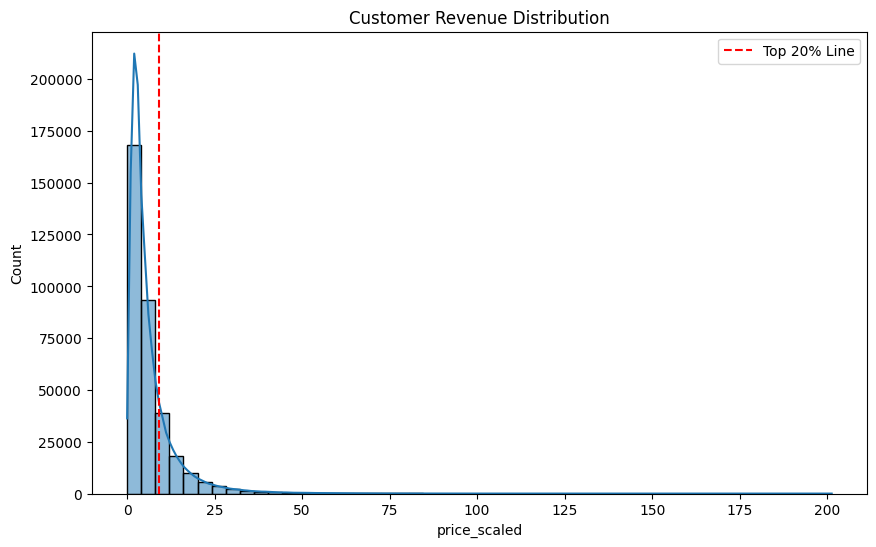

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Price 값 가독성 좋게 키우기 (예: 100 곱하기)
df_final['price_scaled'] = df_final['price'] * 100

# 2. 고객별 총 구매액 계산
customer_revenue = df_final.groupby('customer_id')['price_scaled'].sum().reset_index()

# 3. 상위 20%와 하위 20% 기준점(Cut-off) 찾기
top_20_threshold = customer_revenue['price_scaled'].quantile(0.8) # 상위 20% 지점
bottom_20_threshold = customer_revenue['price_scaled'].quantile(0.2) # 하위 20% 지점

# 4. 그룹 라벨링
def get_group(rev):
    if rev >= top_20_threshold: return 'Top 20% (VIP)'
    elif rev <= bottom_20_threshold: return 'Bottom 20%'
    else: return 'Middle 60%'

customer_revenue['group'] = customer_revenue['price_scaled'].apply(get_group)

# 5. 시각화 (전체 분포 확인)
plt.figure(figsize=(10, 6))
sns.histplot(customer_revenue['price_scaled'], bins=50, kde=True)
plt.axvline(top_20_threshold, color='red', linestyle='--', label='Top 20% Line')
plt.title('Customer Revenue Distribution')
plt.legend()
plt.show()

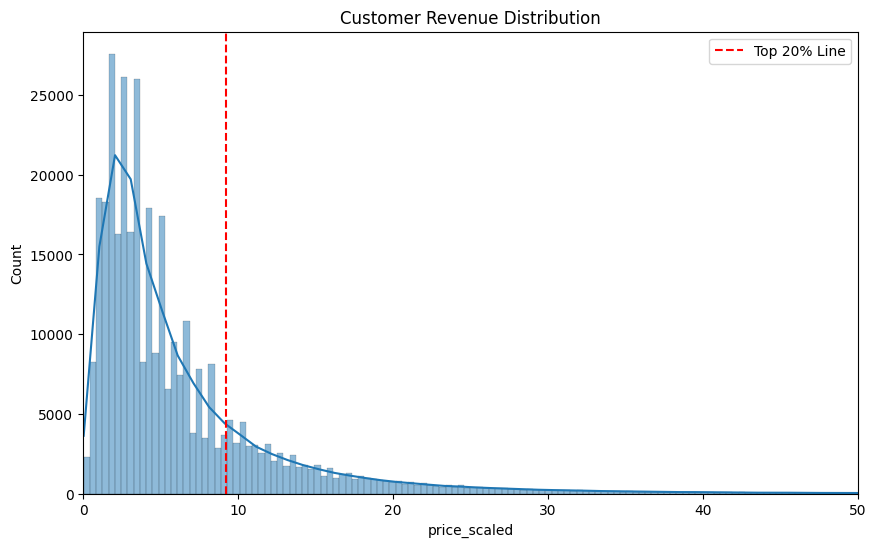

In [ ]:
# X축 범위를 0부터 50까지로 제한
# 막대 bin 을 늘려야 막대그래프가 촘촘하게 나옴
plt.xlim(0, 50)
plt.figure(figsize=(10, 6))
sns.histplot(customer_revenue['price_scaled'], bins=500, kde=True)
plt.xlim(0,50)
plt.axvline(top_20_threshold, color='red', linestyle='--', label='Top 20% Line')
plt.title('Customer Revenue Distribution')
plt.legend()
plt.show()

In [67]:
# 상위 20% 고객 데이터만 따로 저장
top_20_customers = customer_revenue[customer_revenue['price_scaled'] >= top_20_threshold]

# 하위 20% 고객 데이터만 따로 저장
bottom_20_customers = customer_revenue[customer_revenue['price_scaled'] <= bottom_20_threshold]

# 결과 확인 (각각 몇 명이나 있는지?)
print(f"상위 20% 고객 수: {len(top_20_customers)}명")
print(f"하위 20% 고객 수: {len(bottom_20_customers)}명")

상위 20% 고객 수: 68938명
하위 20% 고객 수: 68944명


In [72]:
# customer_revenue 에는 금액만 있고 상품 정보 없음 > df_final 과 합쳐서 구매상품군 확인
# 1. 상위 20% 고객들이 구매한 전체 상세 내역 합치기
top_20_details = df_final[df_final['customer_id'].isin(top_20_customers['customer_id'])]

top_20_details

,t_dat,customer_id,article_id,price,sales_channel_id,FN,Active,club_member_status,fashion_news_frequency,age,product,index_group,garment_group,perceived_colour_master_name,age_group,price_sek,price_scaled
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2,1,1,ACTIVE,Regularly,51,ZEBRA CF TVP (698328),Divided (2),Jersey Fancy (1005),Blue,50대,9.99,1.693220
7,2019-02-22,0e5b7fc9a02c8d44a86575a66b571587fa5178f0705c7b...,751941002,0.036000,2,0,0,ACTIVE,NONE,30,Bonita WH tapered (751941),Ladieswear (1),Trousers (1009),Khaki green,20대,21.24,3.600000
10,2019-11-08,5e7680cc75a00c44a7cc3b507404319c4409b95c458741...,749400009,0.016932,2,0,0,ACTIVE,NONE,28,Tory price tee (749400),Sport (26),Jersey Fancy (1005),Black,20대,9.99,1.693220
12,2019-12-16,60ddf2a3025c0d258e6e36a49ef4552dc1387ef9101ef0...,827526001,0.152525,2,0,0,ACTIVE,NONE,27,Locket dress (827526),Ladieswear (1),Dresses Ladies (1013),Beige,20대,89.99,15.252542
13,2019-06-05,307a703694619dc06c2630fac39d0e11845fecd8a80bfe...,589599036,0.023288,2,0,0,ACTIVE,NONE,24,Shake it in Balconette (589599),Ladieswear (1),Swimwear (1018),Blue,20대,13.74,2.328814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798847,2019-06-18,65a88a4febd8aafe3cbad06ca0ca4e080b456870357a76...,743483004,0.059305,2,0,0,ACTIVE,NONE,25,Nicolaus (743483),Ladieswear (1),Dresses Ladies (1013),Black,20대,34.99,5.930509
798848,2019-01-23,9a34b77f0d5f7aa03ff810e47fdf64be1557cf9fb0fe87...,577675001,0.023712,2,1,1,ACTIVE,Regularly,46,Willa (577675),Ladieswear (1),Blouses (1010),Black,40대,13.99,2.371186
798849,2019-03-25,8e900818a1da0e73300a012794615993fbefb43f851430...,766346001,0.025407,2,0,0,ACTIVE,NONE,21,Kanta RW Slacks (766346),Ladieswear (1),Trousers (1009),Beige,20대,14.99,2.540678
798850,2019-10-18,13aa106eeb8a6fa2f9e2ab888a3a2ee118a3900670f0d8...,811905001,0.016932,2,1,1,ACTIVE,Regularly,39,J Sunray (811905),Ladieswear (1),Dresses Ladies (1013),Black,30대,9.99,1.693220


In [73]:
top_20_items = top_20_details['index_name'].value_counts().head(5)

KeyError: 'index_name'

In [74]:
print(df_final.columns)

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id', 'FN',
       'Active', 'club_member_status', 'fashion_news_frequency', 'age',
       'product', 'index_group', 'garment_group',
       'perceived_colour_master_name', 'age_group', 'price_sek',
       'price_scaled'],
      dtype='object')


In [76]:
top_20_items = top_20_details['index_group'].value_counts().head(5)
top_20_items

index_group
Ladieswear (1)       240562
Divided (2)           79351
Menswear (3)          18385
Sport (26)            12730
Baby/Children (4)     10825
Name: count, dtype: int64

C:\Users\fists\AppData\Local\Temp\ipykernel_24808\3943380709.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_items.index, y=top_20_items.values, palette='viridis')


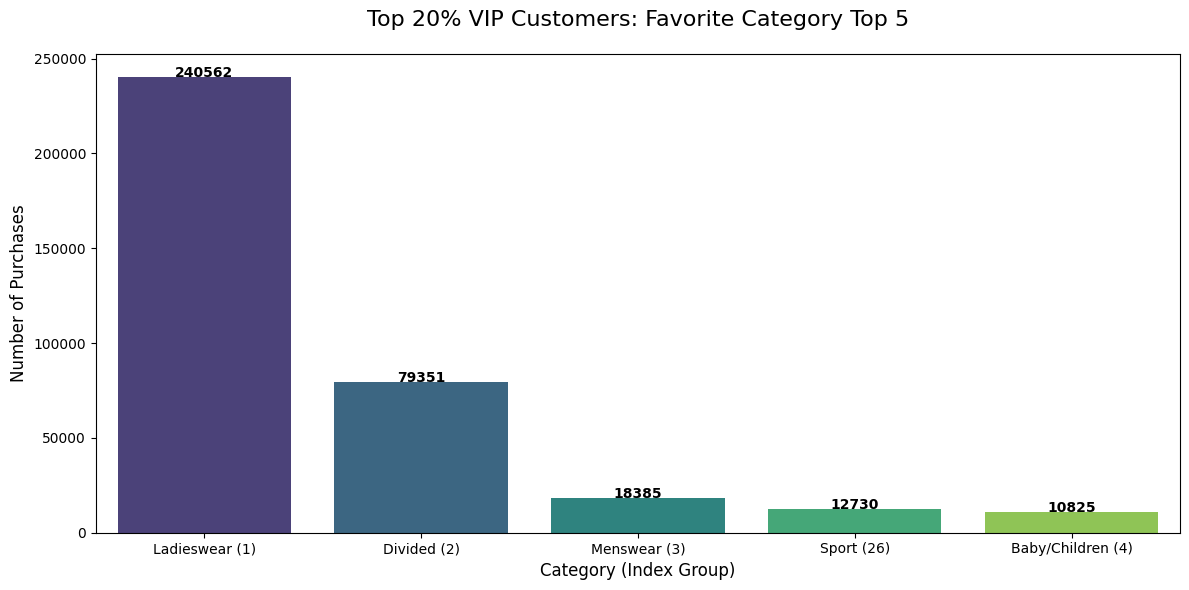

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 시각화 데이터 준비 (앞서 구한 top_20_items)
# index_group으로 다시 구한 결과를 사용합니다.
top_20_details = df_final[df_final['customer_id'].isin(top_20_customers['customer_id'])]
top_20_items = top_20_details['index_group'].value_counts().head(5)

# 2. 그래프 그리기
plt.figure(figsize=(12, 6))
# seaborn의 barplot을 사용하여 세련된 색상 적용
sns.barplot(x=top_20_items.index, y=top_20_items.values, palette='viridis')

# 3. 디자인 요소 추가
plt.title('Top 20% VIP Customers: Favorite Category Top 5', fontsize=16, pad=20)
plt.xlabel('Category (Index Group)', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)

# 앞글자 대문자 처리가 안 되어 있다면 x축 라벨을 돌리면서 capitalize 적용
plt.xticks(rotation=0) # 글자가 짧으면 0, 길면 45

# 막대 위에 숫자 표시 (선택 사항)
for i, v in enumerate(top_20_items.values):
    plt.text(i, v + 3, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()